In [19]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [83]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
#Base.metadata.tables

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [55]:
# Import the sqlalchemy extract function.
# *** SQLite does note support the extract function***
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
q = session.query(Measurement.tobs).filter(func.strftime("%m",Measurement.date) == "06")

In [56]:
# 2. Convert the June temperatures to a list.
june_tobs = [q[0] for q in q]

In [66]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_tobs_df = pd.DataFrame(june_tobs, columns=['June Obs. Temps'])

In [67]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_tobs_df.describe()

,June Obs. Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [ ]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [59]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
q = session.query(Measurement.tobs).filter(func.strftime("%m",Measurement.date) == "12")

In [60]:
# 7. Convert the December temperatures to a list.
dec_tobs = [q[0] for q in q]

In [63]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_tobs_df = pd.DataFrame(dec_tobs, columns=['December Obs. Temps'])

In [64]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_tobs_df.describe()

,December Obs. Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
# 10. Return to your challenge instructions to compare your summary statistics

In [70]:
# Table added for visual clarity

import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

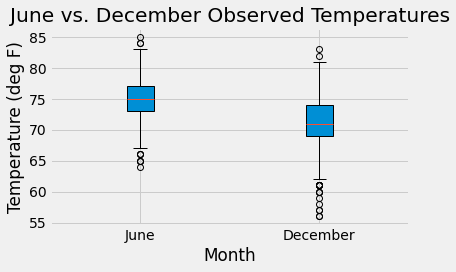

In [82]:
fig_data = [june_tobs, dec_tobs]

fig, ax = plt.subplots()

x = range(len(june_tobs))
ax.boxplot(fig_data, patch_artist=True)
ax.set_title("June vs. December Observed Temperatures")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature (deg F)")
ax.set_xticklabels(["June", "December"])
ax.autoscale
fig.tight_layout()
plt.show()